In [1]:
from SOView import *
import shutil
import os
import gc
from scipy import sparse
import pandas as pd

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
squidpy==1.1.2


In [3]:
path = '/home/yzy/PUBDT/st/spacetx/raw/Visium'

# first data

In [4]:
sample_list = os.listdir(path)

In [7]:
raw_pd = pd.read_csv(f'{path}/{sample_list[0]}',delimiter='\t')

In [9]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [10]:
raw_pd

Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  Lypla1  \
Unnamed: 0                                                                
2363x4035       0       0        0    0      0        0       0       0   
2663x4213       0       0        0    0      0        0       0       0   
2633x6299       0       0        0    0      0        0       0       1   
2328x6468       0       0        0    0      0        0       0       0   
2628x6646       0       0        0    0      0        0       0       0   
...           ...     ...      ...  ...    ...      ...     ...     ...   
22930x25025     0       0        0    0      0        0       0       0   
23245x24161     0       0        0    0      0        0       0       0   
23240x24508     0       0        0    0      0        0       0       0   
23235x24856     0       0        0    0      0        0       0       0   
23906x20345     0       0        0    0      0        0       0       0   

             Gm37988  Tcea1  ...  AC125149.1  AC125149.2  AC125149.4  \
Unnamed: 0                   ...                                       
2363x4035          0      0  ...           0           0           0   
2663x4213          0      0  ...           0           0           0   
2633x6299          0      0  ...           0           0           0   
2328x6468          0      0  ...           0           0           0   
2628x6646          0      0  ...           0           0           0   
...              ...    ...  ...         ...         ...         ...   
22930x25025        0      0  ...           0           0           0   
23245x24161        0      0  ...           0           0           0   
23240x24508        0      0  ...           0           0           0   
23235x24856        0      0  ...           0           0           0   
23906x20345        0      0  ...           0           0           0   

             AC234645.1  AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  \
Unnamed: 0                                                                    
2363x4035             0           0           0           0               0   
2663x4213             0           0           0           0               0   
2633x6299             0           0           0           0               0   
2328x6468             0           0           0           0               0   
2628x6646             0           0           0           0               0   
...                 ...         ...         ...         ...             ...   
22930x25025           0           0           0           0               0   
23245x24161           0           0           0           0               0   
23240x24508           0           0           0           0               0   
23235x24856           0           0           0           0               0   
23906x20345           0           0           0           0               0   

             Vmn2r122  CAAA01147332.1  
Unnamed: 0                             
2363x4035           0               0  
2663x4213           0               0  
2633x6299           0               0  
2328x6468           0               0  
2628x6646           0               0  
...               ...             ...  
22930x25025         0               0  
23245x24161         0               0  
23240x24508         0               0  
23235x24856         0               0  
23906x20345         0               0  

[3354 rows x 31053 columns]

In [11]:
var_names = raw_pd.columns
obs_names = raw_pd.index
X = sparse.csr_matrix(raw_pd.values)

In [12]:
spatial_mat = [xy.split('x') for xy in obs_names]
spatial_mat = np.array(spatial_mat).astype('float')

In [13]:
adata = ad.AnnData(X)
adata.var_names = var_names
adata.obs_names = obs_names
adata.obsm['spatial']=spatial_mat

/tmp/ipykernel_1153042/1296318378.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


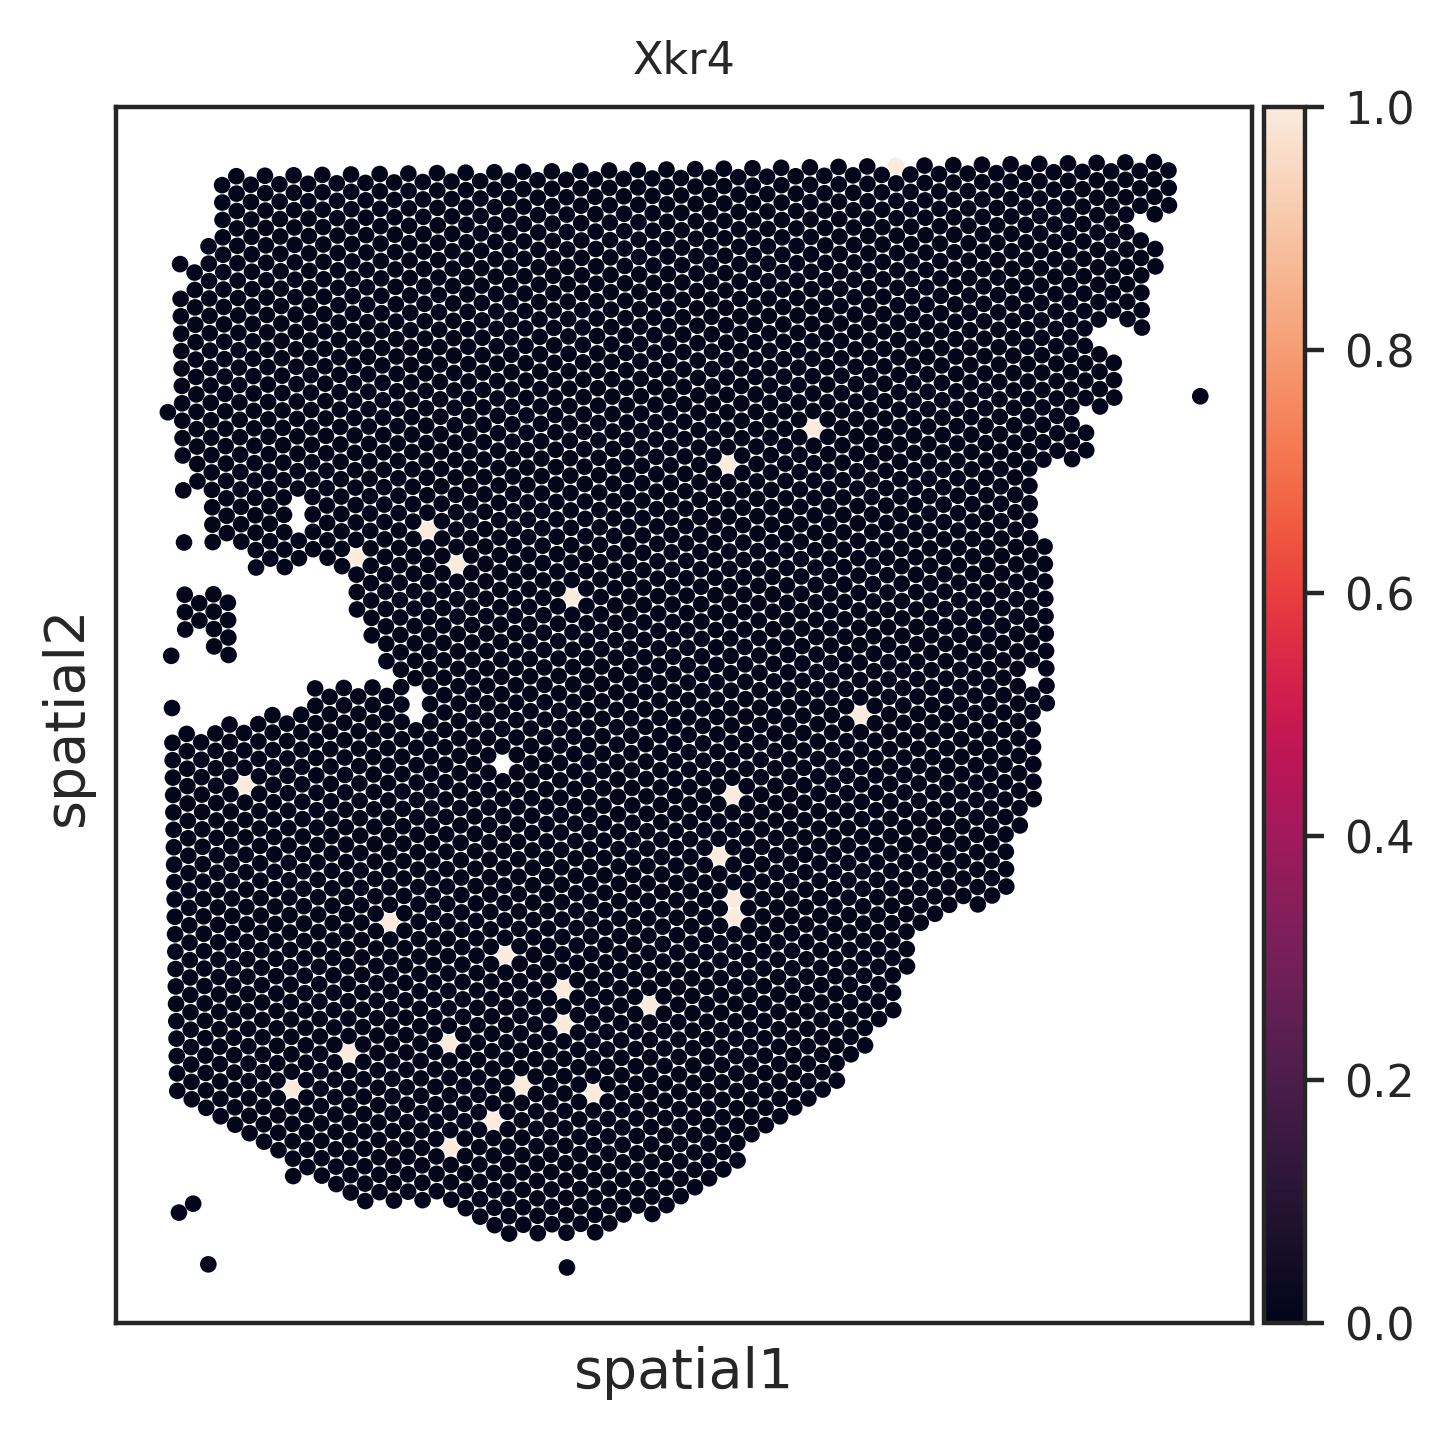

In [15]:
sc.pl.embedding(adata,basis='spatial',color='Xkr4')

# run all

/tmp/ipykernel_1153042/2415698701.py:12: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


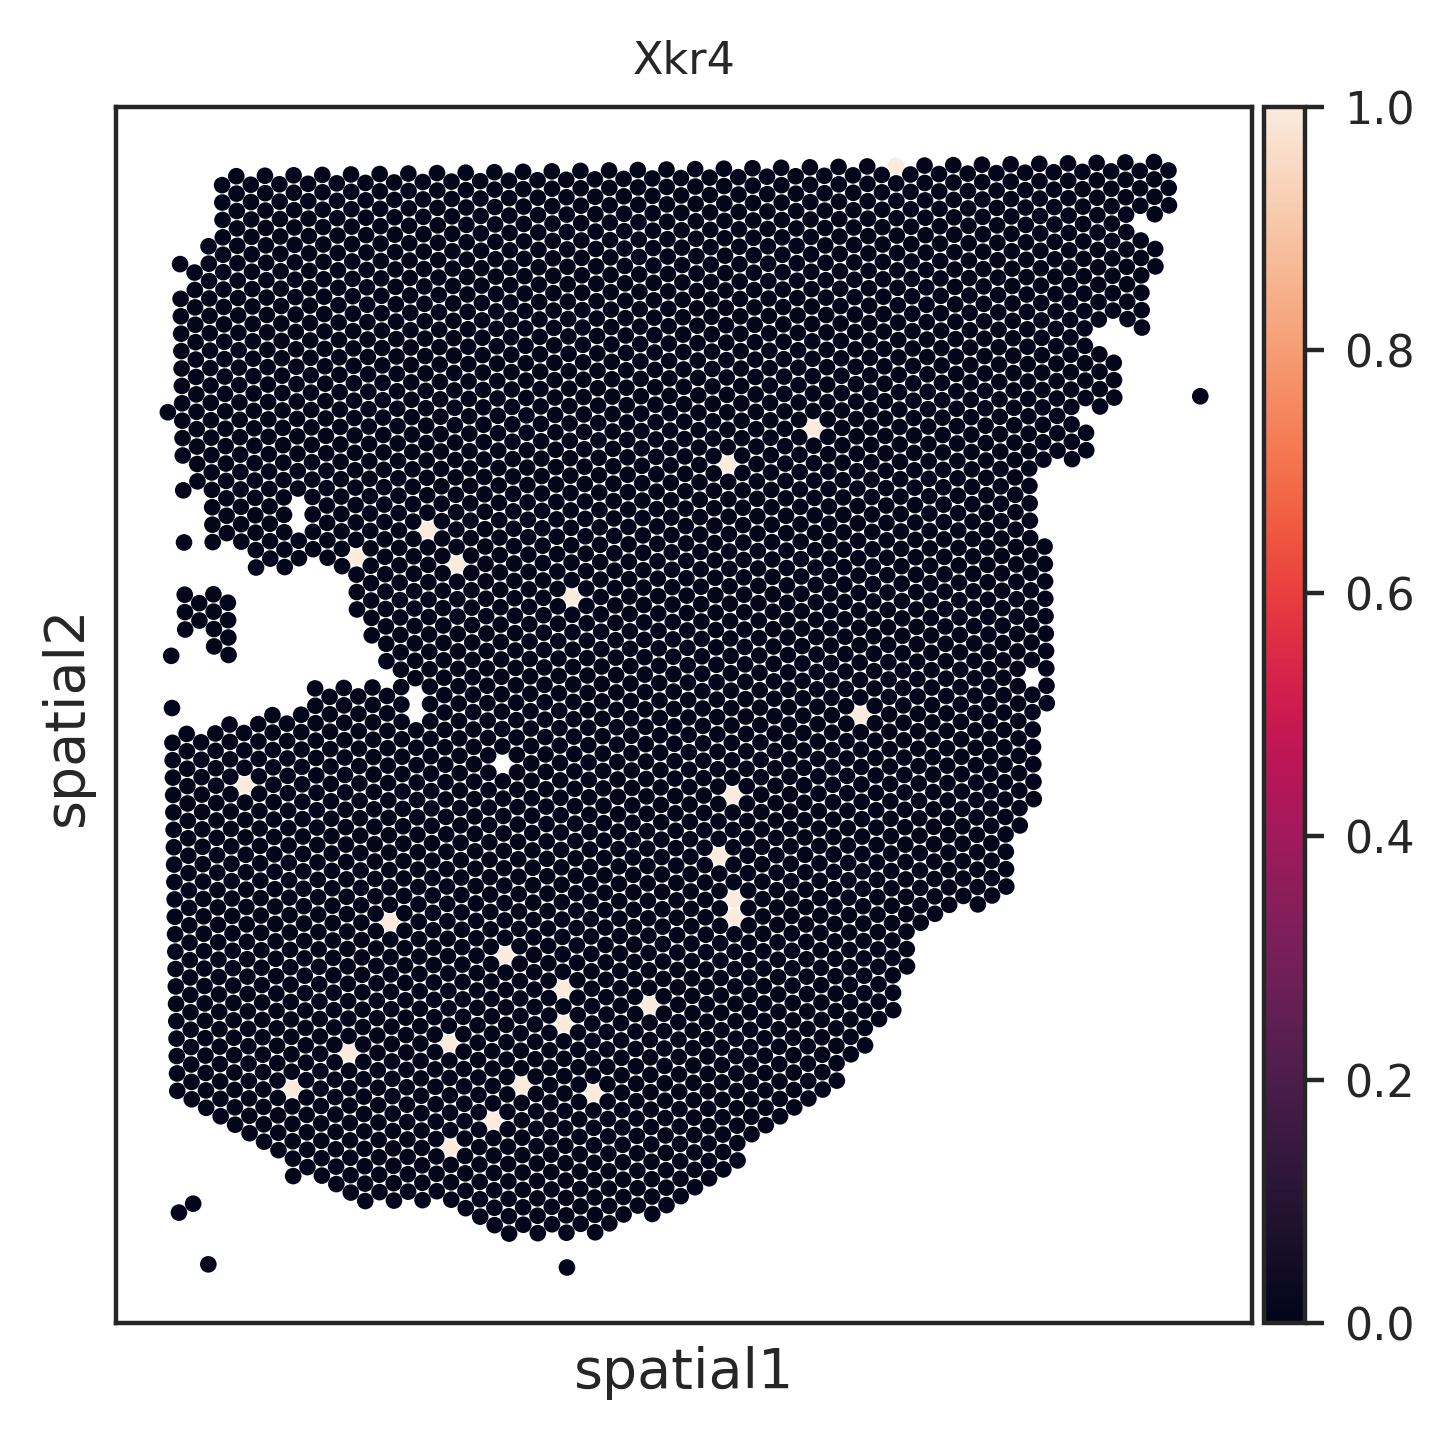

/tmp/ipykernel_1153042/2415698701.py:12: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


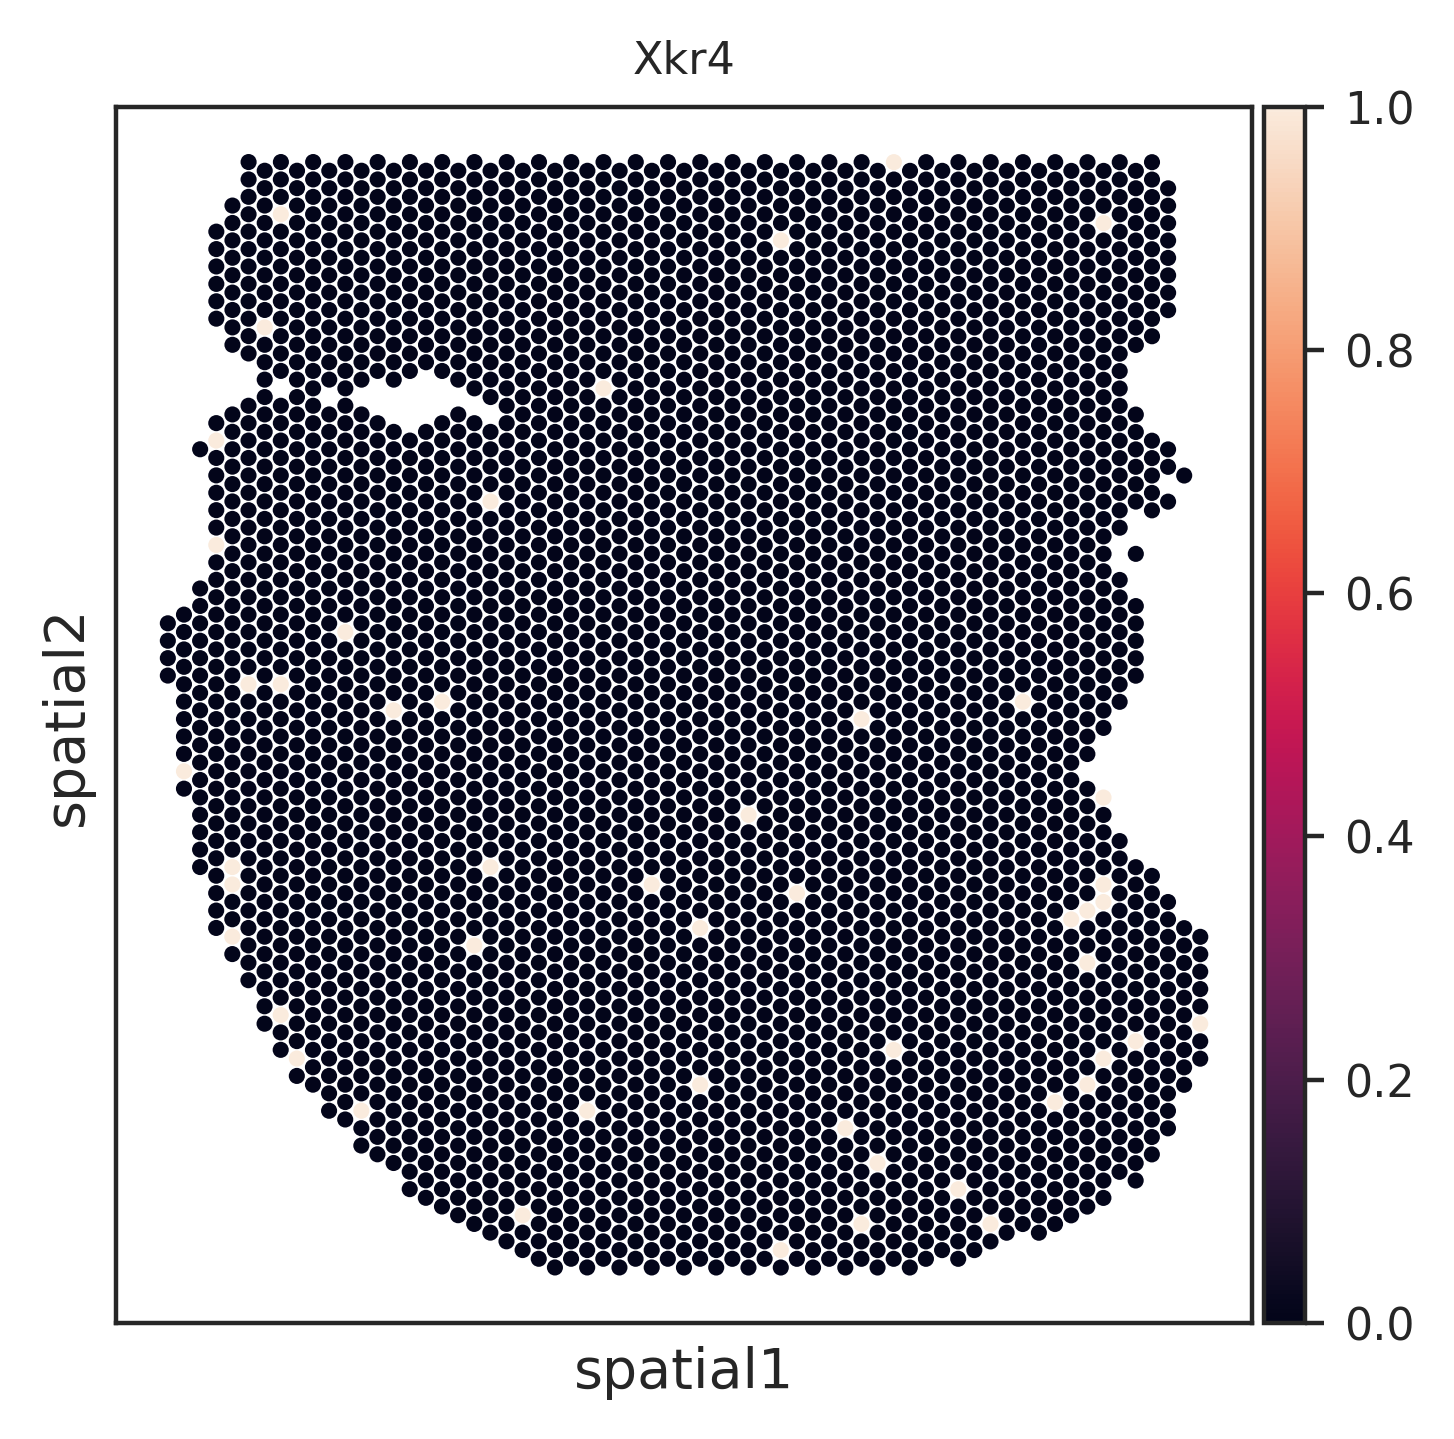

/tmp/ipykernel_1153042/2415698701.py:12: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


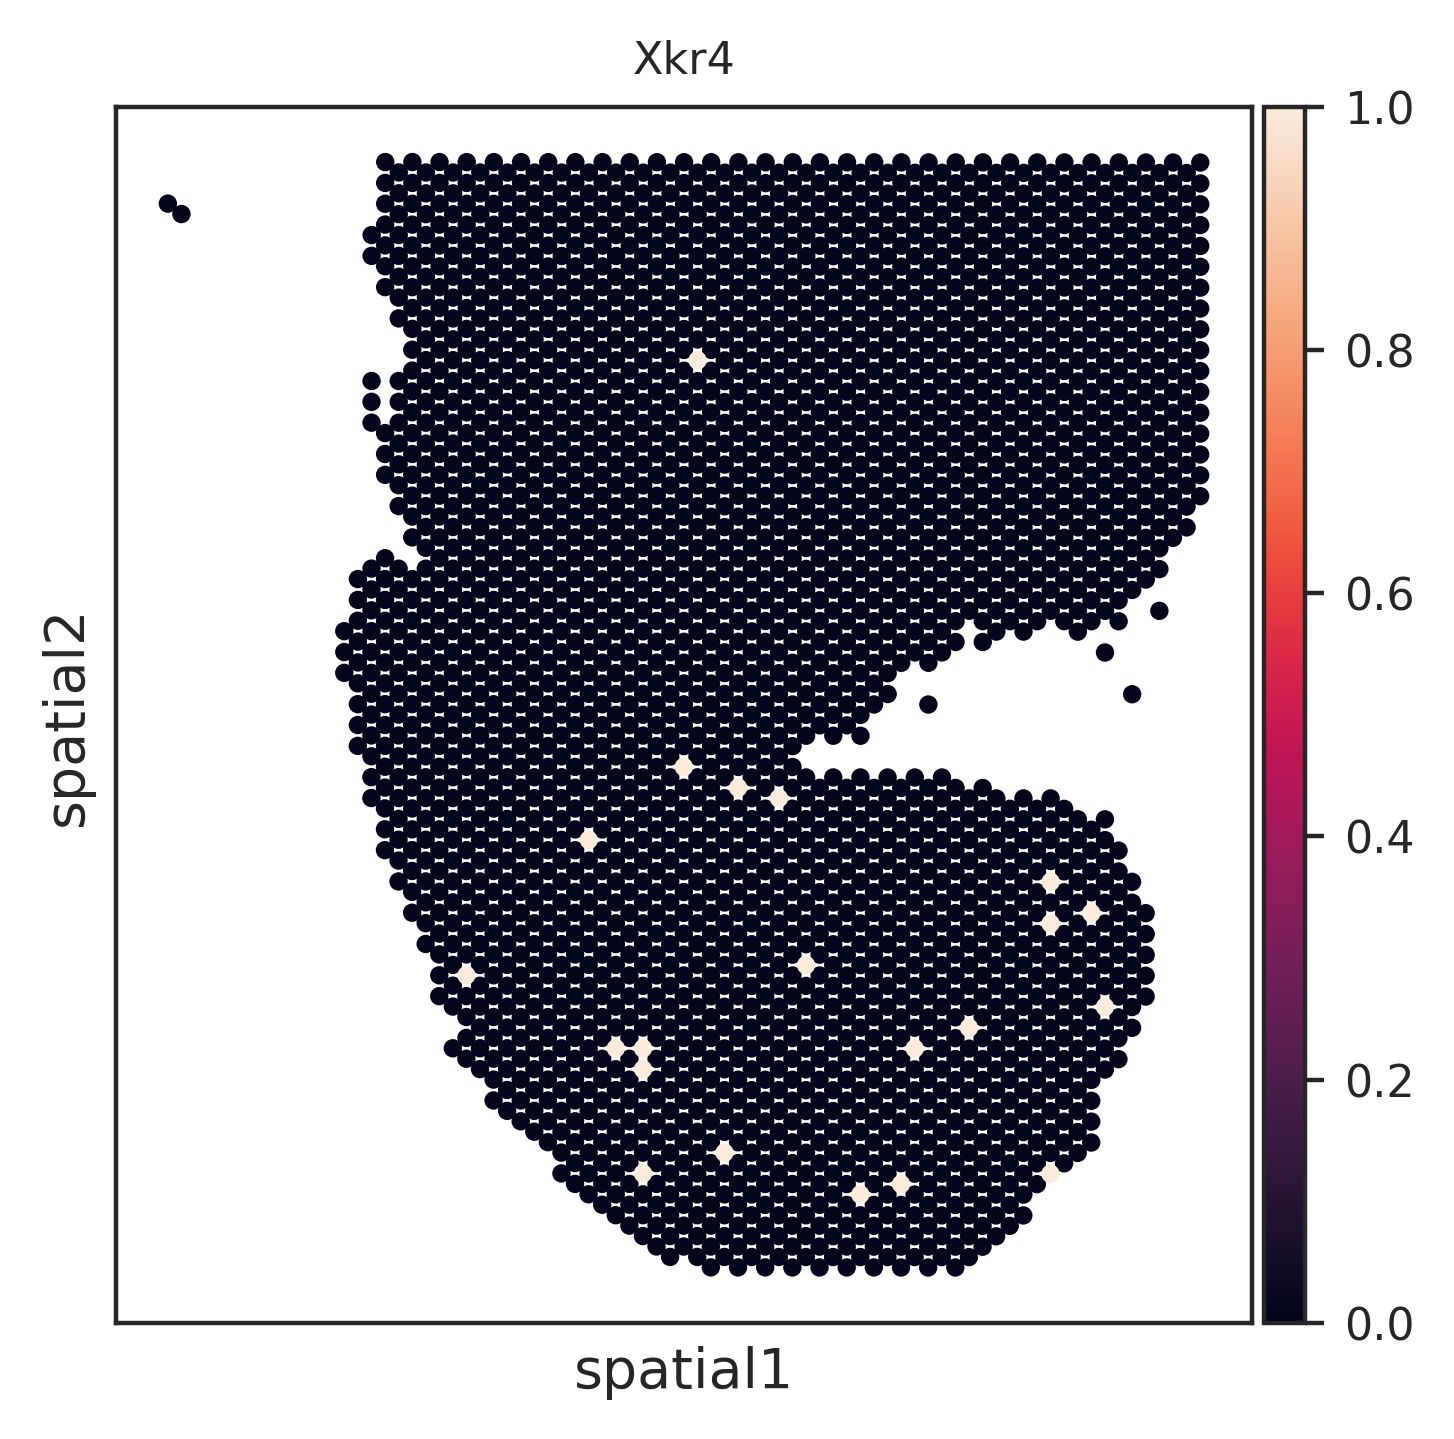

/tmp/ipykernel_1153042/2415698701.py:12: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


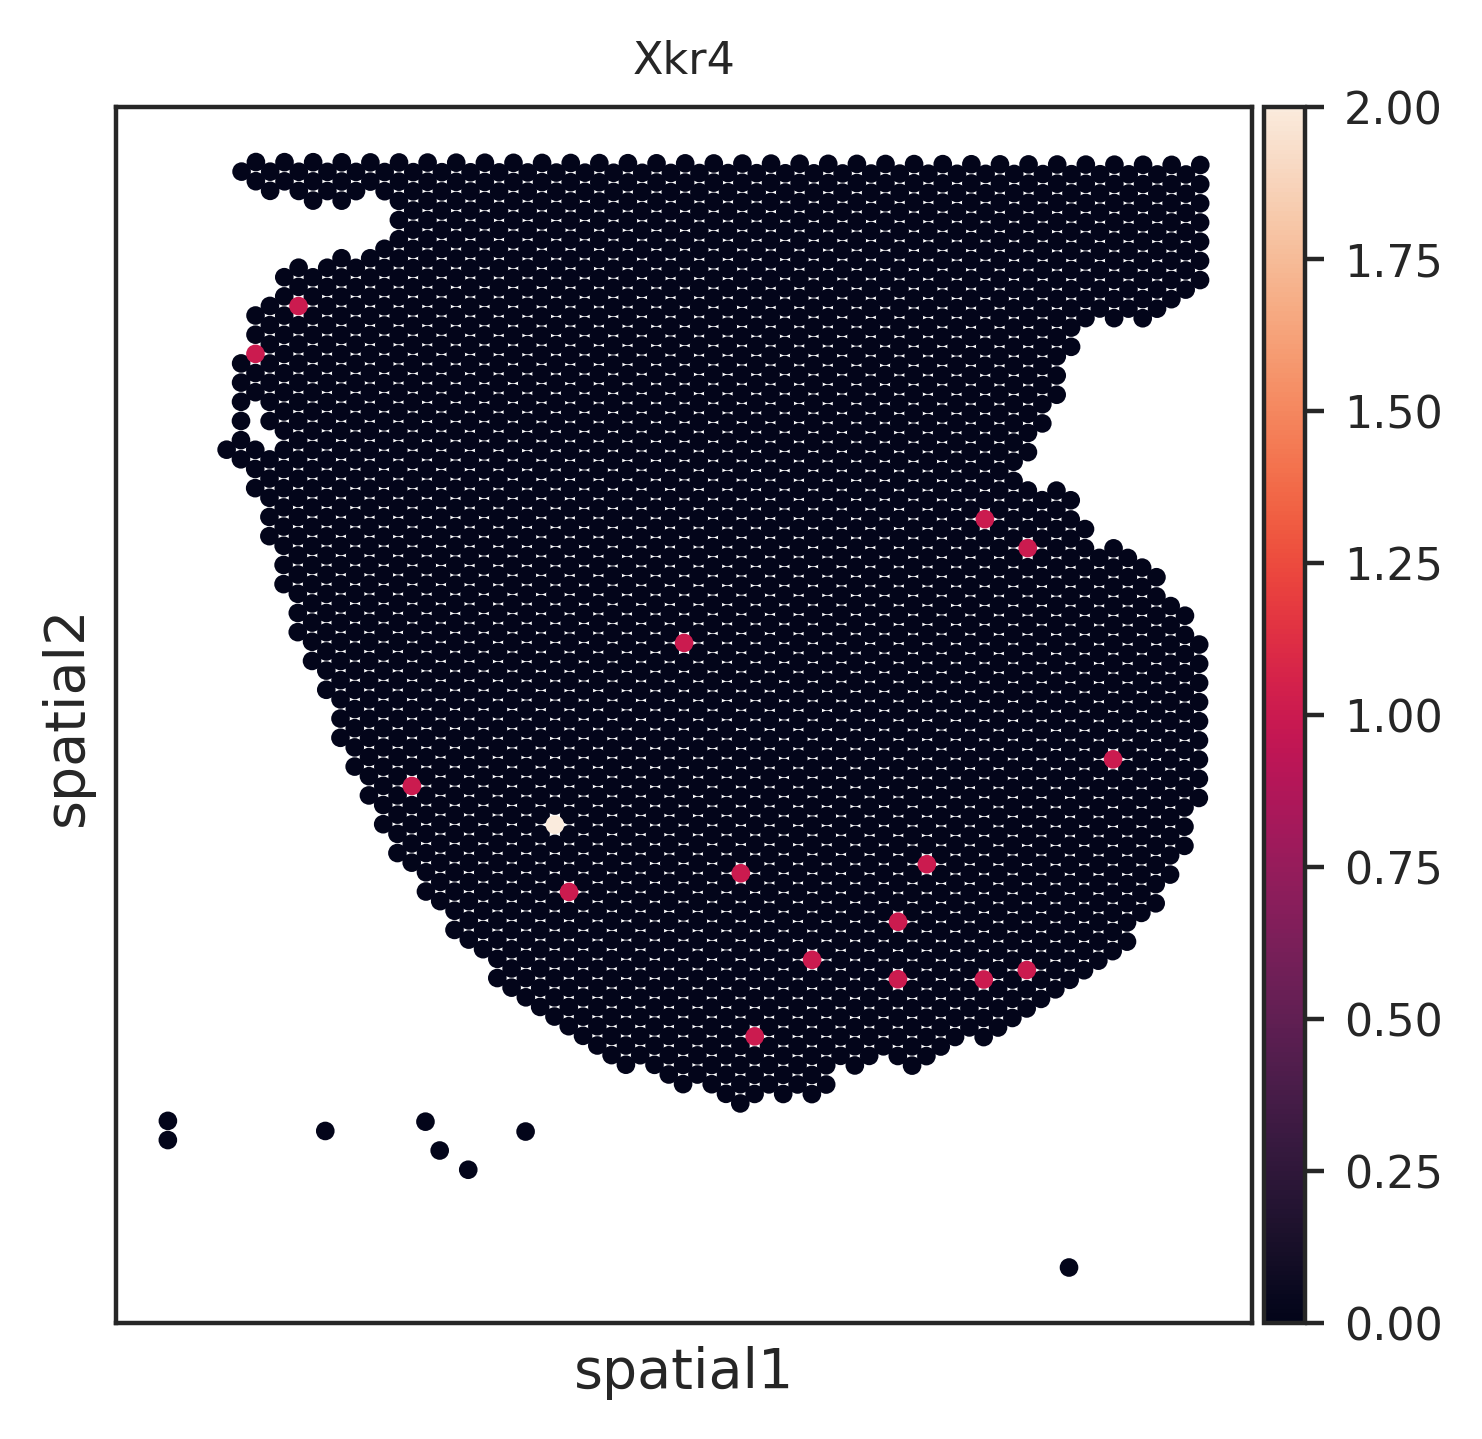

In [16]:
for i in range(len(sample_list)):
    raw_pd = pd.read_csv(f'{path}/{sample_list[i]}',delimiter='\t')
    raw_pd = raw_pd.set_index('Unnamed: 0')

    var_names = raw_pd.columns
    obs_names = raw_pd.index
    X = sparse.csr_matrix(raw_pd.values)

    spatial_mat = [xy.split('x') for xy in obs_names]
    spatial_mat = np.array(spatial_mat).astype('float')

    adata = ad.AnnData(X)
    adata.var_names = var_names
    adata.obs_names = obs_names
    adata.obsm['spatial']=spatial_mat

    sc.pl.embedding(adata,basis='spatial',color='Xkr4')
    adata.write_h5ad(f'{path}/{sample_list[i]}.h5ad')